In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

In [3]:
circuits = pd.read_csv('datasets/circuits.csv')

constructors_standings = pd.read_csv('datasets/constructor_standings.csv')
constructors_df = pd.read_csv('datasets/constructors.csv')

driver_standings = pd.read_csv('datasets/driver_standings.csv')
drivers_df = pd.read_csv('datasets/drivers.csv')

lap_times = pd.read_csv('datasets/lap_times.csv')
pit_stops = pd.read_csv('datasets/pit_stops.csv')

races_df = pd.read_csv('datasets/races.csv')

quali_df = pd.read_csv('datasets/qualifying.csv')
results_df = pd.read_csv('datasets/results.csv')
sprints_df = pd.read_csv('datasets/sprint_results.csv')

status_df = pd.read_csv('datasets/status.csv')

### Preliminary EDA

In [4]:
status_df.info()
status_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Sprint results data

In [5]:
sprints_df.info()
sprints_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        100 non-null    int64 
 1   raceId          100 non-null    int64 
 2   driverId        100 non-null    int64 
 3   constructorId   100 non-null    int64 
 4   number          100 non-null    int64 
 5   grid            100 non-null    int64 
 6   position        100 non-null    object
 7   positionText    100 non-null    object
 8   positionOrder   100 non-null    int64 
 9   points          100 non-null    int64 
 10  laps            100 non-null    int64 
 11  time            100 non-null    object
 12  milliseconds    100 non-null    object
 13  fastestLap      100 non-null    object
 14  fastestLapTime  100 non-null    object
 15  statusId        100 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 12.6+ KB


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [6]:
# position tells the actual position drivers ended up with, meaning if they didn't finish the race, the position column will be NA while 
# positionOrder gives order in which they end up after the race
sprints_df = sprints_df.drop(columns={'number', 'position', 'positionText'})
sprints_df.head()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,2,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,1,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,6,5,0,17,+24.111,1562537,16,1:30.566,1


Race results data

In [7]:
results_df.info()
results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number           25660 non-null  object 
 5   grid             25660 non-null  int64  
 6   position         25660 non-null  object 
 7   positionText     25660 non-null  object 
 8   positionOrder    25660 non-null  int64  
 9   points           25660 non-null  float64
 10  laps             25660 non-null  int64  
 11  time             25660 non-null  object 
 12  milliseconds     25660 non-null  object 
 13  fastestLap       25660 non-null  object 
 14  rank             25660 non-null  object 
 15  fastestLapTime   25660 non-null  object 
 16  fastestLapSpeed  25660 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [8]:
results_df = results_df.drop(columns={'number','position','positionText'})
results_df.head()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Qualifying results data

In [9]:
quali_df.info()
quali_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9395 non-null   int64 
 1   raceId         9395 non-null   int64 
 2   driverId       9395 non-null   int64 
 3   constructorId  9395 non-null   int64 
 4   number         9395 non-null   int64 
 5   position       9395 non-null   int64 
 6   q1             9387 non-null   object
 7   q2             9244 non-null   object
 8   q3             9101 non-null   object
dtypes: int64(6), object(3)
memory usage: 660.7+ KB


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [10]:
quali_df = quali_df.drop('number', axis=1)
quali_df.head()

,qualifyId,raceId,driverId,constructorId,position,q1,q2,q3
0,1,18,1,1,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,5,1:25.960,1:25.518,1:27.236


Races data

In [11]:
races_df.info()
races_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1079 non-null   int64 
 1   year         1079 non-null   int64 
 2   round        1079 non-null   int64 
 3   circuitId    1079 non-null   int64 
 4   name         1079 non-null   object
 5   date         1079 non-null   object
 6   time         1079 non-null   object
 7   url          1079 non-null   object
 8   fp1_date     1079 non-null   object
 9   fp1_time     1079 non-null   object
 10  fp2_date     1079 non-null   object
 11  fp2_time     1079 non-null   object
 12  fp3_date     1079 non-null   object
 13  fp3_time     1079 non-null   object
 14  quali_date   1079 non-null   object
 15  quali_time   1079 non-null   object
 16  sprint_date  1079 non-null   object
 17  sprint_time  1079 non-null   object
dtypes: int64(4), object(14)
memory usage: 151.9+ KB


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [12]:
# dropping fp1_date to sprint_time as they have all null values until 2021
races_df = races_df.drop(columns={'url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date', 'quali_time', 'sprint_date', 'sprint_time'})
races_df.head()

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


Pit stop data

In [13]:
pit_stops.info()
pit_stops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9299 entries, 0 to 9298
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9299 non-null   int64 
 1   driverId      9299 non-null   int64 
 2   stop          9299 non-null   int64 
 3   lap           9299 non-null   int64 
 4   time          9299 non-null   object
 5   duration      9299 non-null   object
 6   milliseconds  9299 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 508.7+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


Lap time data

In [14]:
lap_times.info()
lap_times.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528785 entries, 0 to 528784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        528785 non-null  int64 
 1   driverId      528785 non-null  int64 
 2   lap           528785 non-null  int64 
 3   position      528785 non-null  int64 
 4   time          528785 non-null  object
 5   milliseconds  528785 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.2+ MB


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


Drivers data

In [15]:
drivers_df.info()
drivers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [16]:
drivers_df = drivers_df.drop('url', axis=1)
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [17]:
driver_standings.info()
driver_standings = driver_standings.drop('positionText', axis=1)
driver_standings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33686 non-null  int64  
 1   raceId             33686 non-null  int64  
 2   driverId           33686 non-null  int64  
 3   points             33686 non-null  float64
 4   position           33686 non-null  int64  
 5   positionText       33686 non-null  object 
 6   wins               33686 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0


Constructors data

In [18]:
constructors_standings.info()
constructors_standings = constructors_standings.drop('positionText', axis=1)
constructors_standings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12841 non-null  int64  
 1   raceId                  12841 non-null  int64  
 2   constructorId           12841 non-null  int64  
 3   points                  12841 non-null  float64
 4   position                12841 non-null  int64  
 5   positionText            12841 non-null  object 
 6   wins                    12841 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 702.4+ KB


,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0


In [19]:
constructors_df.info()
constructors_df = constructors_df.drop(columns='url')
constructors_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


### EDA

Checking Null Values

In [20]:
status_df.isna().sum()

statusId    0
status      0
dtype: int64

In [21]:
sprints_df.isna().sum()

resultId          0
raceId            0
driverId          0
constructorId     0
grid              0
positionOrder     0
points            0
laps              0
time              0
milliseconds      0
fastestLap        0
fastestLapTime    0
statusId          0
dtype: int64

In [22]:
results_df.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
grid               0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [23]:
quali_df.isna().sum()

qualifyId          0
raceId             0
driverId           0
constructorId      0
position           0
q1                 8
q2               151
q3               294
dtype: int64

In [24]:
drivers_df.isna().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
dtype: int64

In [25]:
driver_standings.isna().sum()

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
wins                 0
dtype: int64

In [26]:
constructors_standings.isna().sum()

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
wins                      0
dtype: int64

In [27]:
# Merging a few dataframes for analysis
join1 = pd.merge(results_df, drivers_df, on='driverId')
join2 = pd.merge(join1, driver_standings, on='driverId')
join3 = pd.merge(join2, constructors_df, on='constructorId')
df = pd.merge(join3, status_df, on='statusId')
df.head()


,resultId,raceId_x,driverId,constructorId,grid,positionOrder,points_x,laps,time,milliseconds,...,nationality_x,driverStandingsId,raceId_y,points_y,position,wins,constructorRef,name,nationality_y,status
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,British,1,18,10.0,1,1,mclaren,McLaren,British,Finished
1,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,British,9,19,14.0,1,1,mclaren,McLaren,British,Finished
2,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,British,27,20,14.0,3,1,mclaren,McLaren,British,Finished
3,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,British,48,21,20.0,2,1,mclaren,McLaren,British,Finished
4,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,British,69,22,28.0,3,1,mclaren,McLaren,British,Finished


In [28]:
df.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'grid',
       'positionOrder', 'points_x', 'laps', 'time', 'milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality_x', 'driverStandingsId', 'raceId_y', 'points_y',
       'position', 'wins', 'constructorRef', 'name', 'nationality_y',
       'status'],
      dtype='object')

In [29]:
# Dropping unnecessary columns
df = df.drop(columns={'position_x', 'fastestLapTime', 'time', 'driverRef', 'constructorRef', 'nationality_x', 'nationality_y', 'positionText', 'raceId_y'})
df.columns

KeyError: "['position_x' 'positionText'] not found in axis"

In [ ]:
# Changing the data types of some columns
col = ['milliseconds','fastestLap','fastestLapSpeed']
for i in col:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [ ]:
df.dtypes

resultId               int64
raceId_x               int64
driverId               int64
constructorId          int64
grid                   int64
positionOrder          int64
points_x             float64
laps                   int64
milliseconds         float64
fastestLap           float64
rank                  object
fastestLapSpeed      float64
statusId               int64
number                object
code                  object
forename              object
surname               object
dob                   object
driverStandingsId      int64
points_y             float64
position_y             int64
wins                   int64
name                  object
status                object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3420101.0,1.223640e+04,8.021454e+03,1.00,4915.000,11326.000,20676.000,25665.00
raceId_x,3420101.0,5.002590e+02,3.219146e+02,1.00,227.000,453.000,817.000,1086.00
driverId,3420101.0,1.907530e+02,2.508035e+02,1.00,20.000,102.000,222.000,855.00
constructorId,3420101.0,3.810112e+01,5.524658e+01,1.00,6.000,17.000,36.000,214.00
grid,3420101.0,9.797326e+00,6.584370e+00,0.00,4.000,9.000,15.000,34.00
positionOrder,3420101.0,1.129757e+01,7.413347e+00,1.00,5.000,10.000,17.000,39.00
points_x,3420101.0,2.876621e+00,5.192614e+00,0.00,0.000,0.000,4.000,50.00
laps,3420101.0,4.815164e+01,2.532407e+01,0.00,32.000,54.000,67.000,200.00
milliseconds,1285783.0,5.952264e+06,1.212984e+06,207071.00,5369714.000,5711712.000,6190267.000,15090540.00
fastestLap,1284222.0,4.266388e+01,1.678206e+01,2.00,32.000,46.000,54.000,85.00


In [ ]:
df.isna().sum() / len(df)*100

resultId              0.000000
raceId_x              0.000000
driverId              0.000000
constructorId         0.000000
grid                  0.000000
positionOrder         0.000000
points_x              0.000000
laps                  0.000000
milliseconds         62.405116
fastestLap           62.450758
rank                  0.000000
fastestLapSpeed      62.450758
statusId              0.000000
number                0.000000
code                  0.000000
forename              0.000000
surname               0.000000
dob                   0.000000
driverStandingsId     0.000000
points_y              0.000000
position_y            0.000000
wins                  0.000000
name                  0.000000
status                0.000000
dtype: float64

In [ ]:
# Filling in missing values
df['fastestLap'] = df['fastestLap'].fillna(0)
df['milliseconds'] = df['milliseconds'].fillna(df['milliseconds'].mean())
df['fastestLapSpeed'] = df['fastestLapSpeed'].fillna(df['fastestLapSpeed'].mean())

In [ ]:
# Checking for skewness
df.skew()

C:\Users\ayush\AppData\Local\Temp/ipykernel_15556/583836412.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


resultId             0.147050
raceId_x             0.250529
driverId             1.713801
constructorId        2.004581
grid                 0.432015
positionOrder        0.455197
points_x             2.405225
laps                -0.080104
milliseconds         2.698866
fastestLap          -0.487646
fastestLapSpeed     -0.611115
statusId             2.829860
driverStandingsId   -0.050524
points_y             3.393441
position_y           1.754809
wins                 3.798720
dtype: float64

In [ ]:
# Outlier treatment
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df.head()

C:\Users\ayush\AppData\Local\Temp/ipykernel_15556/2569422402.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]


,resultId,raceId_x,driverId,constructorId,grid,positionOrder,points_x,laps,milliseconds,fastestLap,...,code,forename,surname,dob,driverStandingsId,points_y,position_y,wins,name,status
18,1,18,1,1,1,1,10.0,58,5690616.0,39.0,...,HAM,Lewis,Hamilton,1985-01-07,13652,22.0,3,0,McLaren,Finished
19,1,18,1,1,1,1,10.0,58,5690616.0,39.0,...,HAM,Lewis,Hamilton,1985-01-07,68157,18.0,2,0,McLaren,Finished
20,1,18,1,1,1,1,10.0,58,5690616.0,39.0,...,HAM,Lewis,Hamilton,1985-01-07,13615,6.0,3,0,McLaren,Finished
21,1,18,1,1,1,1,10.0,58,5690616.0,39.0,...,HAM,Lewis,Hamilton,1985-01-07,13632,14.0,3,0,McLaren,Finished
22,1,18,1,1,1,1,10.0,58,5690616.0,39.0,...,HAM,Lewis,Hamilton,1985-01-07,13673,30.0,1,0,McLaren,Finished


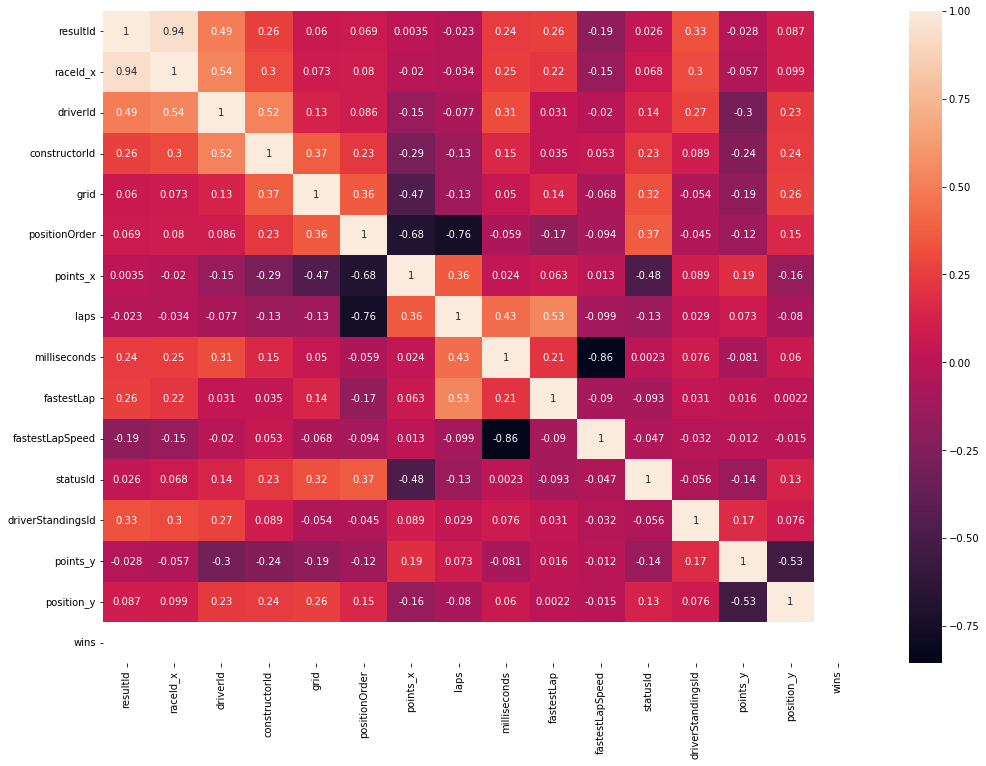

In [ ]:
# Correlation heatmap
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df['fastestLap'][1299029]

nan